In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler,LabelEncoder
from xgboost import XGBRegressor
import scipy.stats as stats

#Onde conseguimos os dados
#https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download

dados = pd.read_csv("/content/insurance.csv")

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#Verificação de Nulos
dados.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
dados.head(24)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


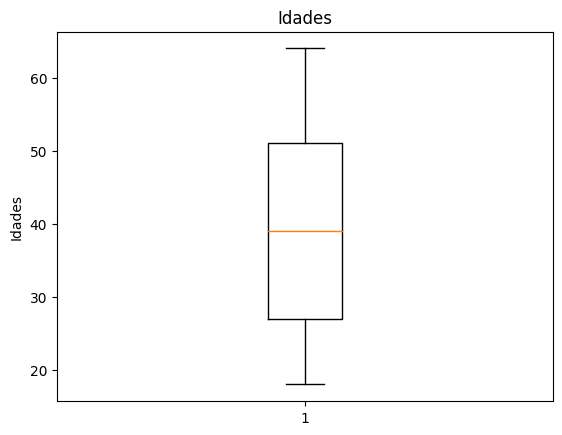

In [ ]:
#Observandos se há outliers
plt.boxplot(dados['age'])
plt.title('Idades')
plt.ylabel('Idades')
plt.show()

In [ ]:
# Plotando o histograma para visualizar a distribuição
plt.figure(figsize=(8, 6))
sns.histplot(dados['age'], bins=10, color='blue')

plt.title('Distribuição de Idade', fontsize=16)
plt.xlabel('age', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.grid(True)

# Exibindo o gráfico
plt.show()

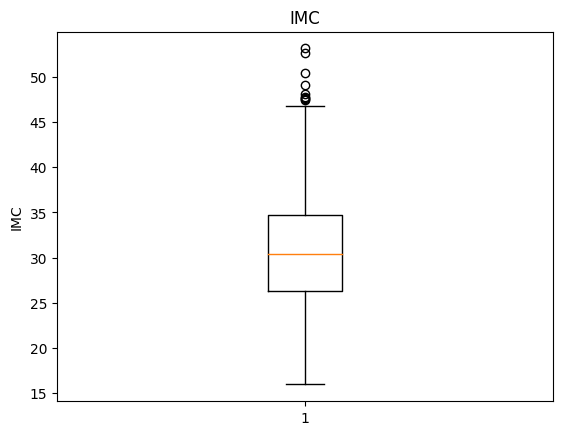

In [ ]:
plt.boxplot(dados['bmi'])
plt.title('IMC')
plt.ylabel('IMC')
plt.show()

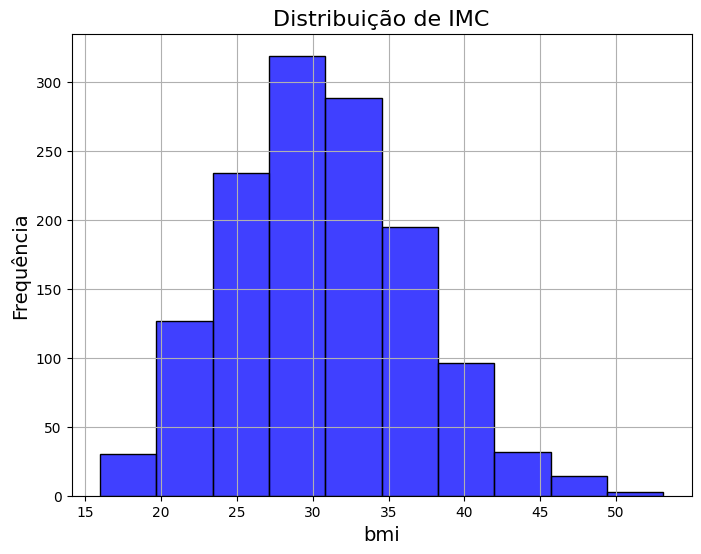

In [ ]:
# Plotando o histograma para visualizar outliers
plt.figure(figsize=(8, 6))
sns.histplot(dados['bmi'], bins=10, color='blue')

plt.title('Distribuição de IMC', fontsize=16)
plt.xlabel('bmi', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.grid(True)

# Exibindo o gráfico
plt.show()

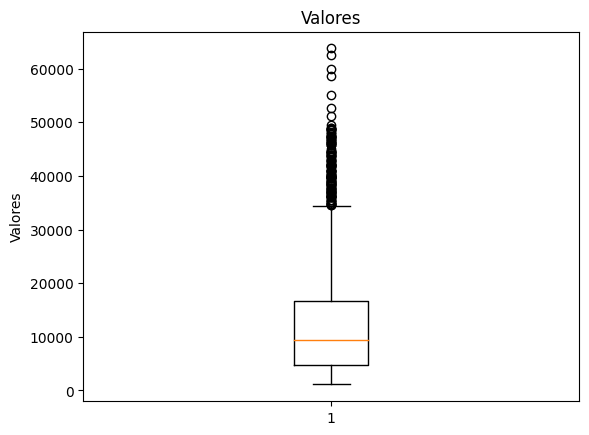

In [ ]:
plt.boxplot(dados['charges'])
plt.title('Valores')
plt.ylabel('Valores')
plt.show()

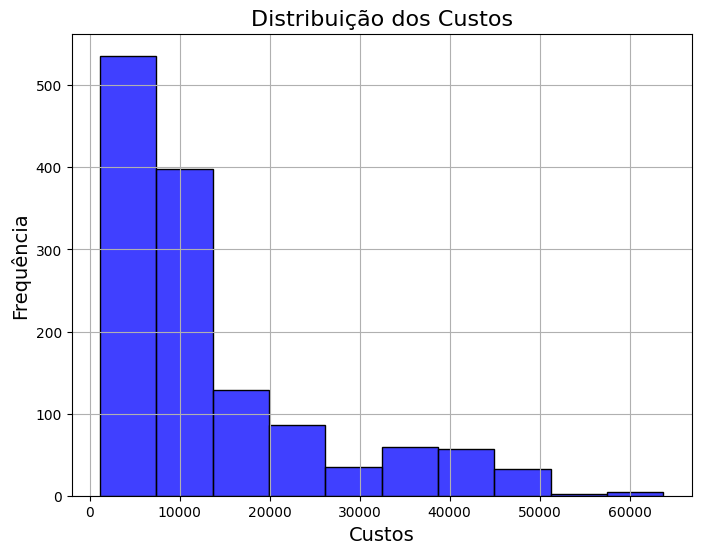

In [ ]:
# Plotando o histograma para visualizar outliers
plt.figure(figsize=(8, 6))
sns.histplot(dados['charges'], bins=10, color='blue')

plt.title('Distribuição dos Custos', fontsize=16)
plt.xlabel('Custos', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.grid(True)

# Exibindo o gráfico
plt.show()

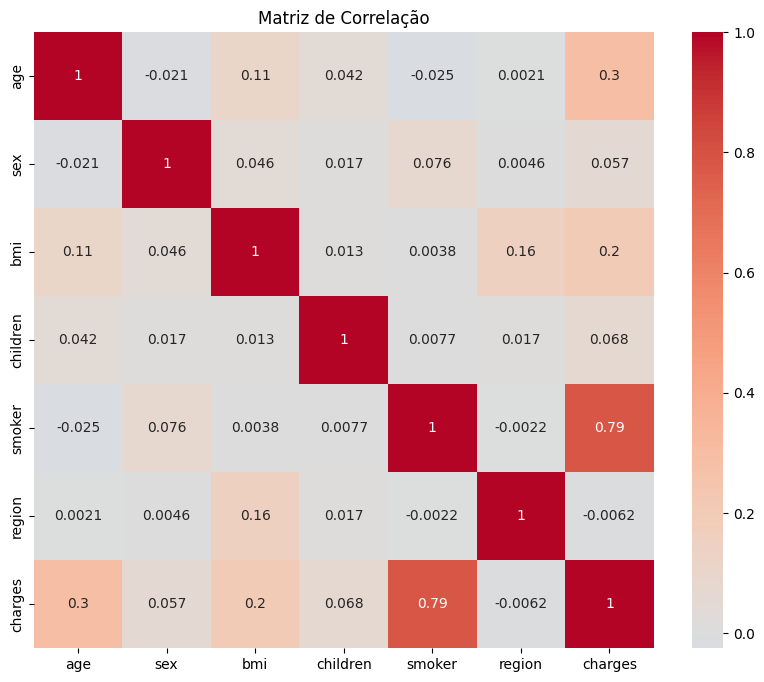

In [ ]:
#Tratamento de Dados usando LabelEncoder para visualização da Correlação
label_encoder = LabelEncoder()

dados["sex"] = label_encoder.fit_transform(dados["sex"])
dados["smoker"] = label_encoder.fit_transform(dados["smoker"])
dados["region"] = label_encoder.fit_transform(dados["region"])

# Calculando a matriz de correlação
matriz_correlacao = dados.corr()

# Visualizando a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
# Variáveis independentes (features)
X = dados.drop(columns=['charges'])

# Variável dependente (target)
y = dados['charges']

# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Padronizando Dados
scaler = StandardScaler()

scaler.fit(X_train)

x_train_standard = scaler.transform(X_train)
x_test_standard= scaler.transform(X_test)

Erro Médio Quadrático: 19079500.876352366
Erro Absoluto Médio: 2365.862142961739
R² (coeficiente de determinação): 0.8771036600877903


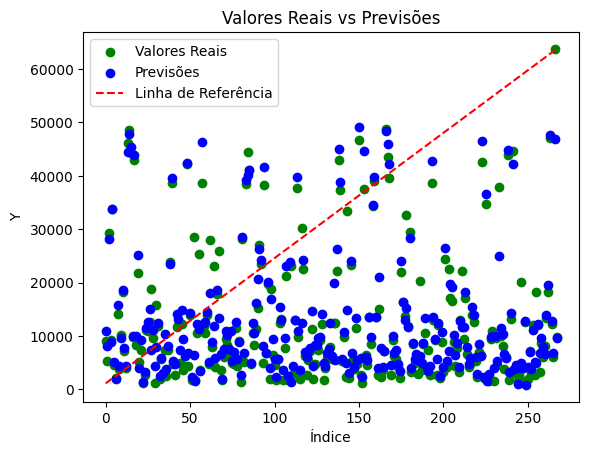

In [ ]:
#Diferença entre LabelEnconder e OneHotEncoder no XGBRegressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Treinando o pipeline com os dados de treino
model.fit(x_train_standard, y_train)

# Prevendo no conjunto de teste
previsoes = model.predict(x_test_standard)

# Avaliando o desempenho do modelo
erro_medio_quadratico = mean_squared_error(y_test, previsoes)
erro_absoluto_medio = mean_absolute_error(y_test, previsoes)
r_quadrado = r2_score(y_test, previsoes)

print(f'Erro Médio Quadrático: {erro_medio_quadratico}')
print(f'Erro Absoluto Médio: {erro_absoluto_medio}')
print(f'R² (coeficiente de determinação): {r_quadrado}')

#Visualizando as previsões
plt.scatter(range(len(y_test)), y_test, color='green', label='Valores Reais')  # Valores reais em verde
plt.scatter(range(len(previsoes)), previsoes, color='blue', label='Previsões')       # Previsões em azul
plt.plot([0, len(y_test)-1], [min(y_test), max(y_test)], 'r--', label='Linha de Referência')  # Linha de referência
plt.xlabel('Índice')
plt.ylabel('Y')
plt.title('Valores Reais vs Previsões')
plt.legend()
plt.show()

In [ ]:
# Calculando o p-value
p_value = stats.ttest_rel(y_test, previsoes).pvalue

# Definindo um nível de significância, como 0,05
nivel_significancia = 0.05

print("p-value",p_value)

# Verificando se o p-value é menor que o nível de significância
if p_value < nivel_significancia:
    print("O modelo é estatisticamente significativo.")
else:
    print("O modelo não é estatisticamente significativo.")


# Calculando o intervalo de confiança de 95%
intervalo_confianca = stats.t.interval(0.95, len(y_test)-1, loc=previsoes.mean(), scale=stats.sem(previsoes))

print("O intervalo de confiança das previsões dos custos é:", intervalo_confianca)

# Calcular a média da coluna 'Custos'
media_custos = dados['charges'].mean()

print("Média dos custos:", media_custos)

p-value 0.6078251825487486
O modelo não é estatisticamente significativo.
O intervalo de confiança das previsões dos custos é: (11673.658061266264, 14537.529438733736)
Média dos custos: 13270.422265141257
